In [2]:
%pip install pandas
import pandas as pd
import re

You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_radiology = pd.read_csv("radiology.csv")
rows, cols = df_radiology.shape
print(f"the radiology data set consists of: {rows} rows and {cols} columns")

the radiology data set consists of: 2321355 rows and 8 columns


# Data Analysis and Overview

Below we will continue with the analysis of the data. 
Following will be a brief look at the structure of the data, 
cleaning and comments on data distribution, missing values, 
duplicate data etc. 

In [4]:
# comment out for preference
# pd.set_option('display.max_colwidth', None)

In [5]:
df_radiology.head(5)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hi..."
3,10000032-RR-18,10000032,NaN,RR,18,2180-06-03 12:46:00,2180-06-03 14:01:00,EXAMINATION: Ultrasound-guided paracentesis.\...
4,10000032-RR-20,10000032,NaN,RR,20,2180-07-08 13:18:00,2180-07-08 14:15:00,EXAMINATION: Paracentesis\n\nINDICATION: ___...


## Dive into the Data

In [6]:
# missing values and types
data_types = df_radiology.dtypes
print(data_types)

note_id        object
subject_id      int64
hadm_id       float64
note_type      object
note_seq        int64
charttime      object
storetime      object
text           object
dtype: object


In [7]:
# looking for missing values
missing_rows = df_radiology.isna().sum(axis=1)
num_rows_with_missing_values = (missing_rows > 0).sum()
print(f"Number of rows with NA values: {num_rows_with_missing_values}")

Number of rows with NA values: 1176597


In [8]:
# removing missing rows
df_radiology_clean = df_radiology.dropna()

In [9]:
df_radiology_clean.head()

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hi..."
6,10000032-RR-22,10000032,22841357.0,RR,22,2180-06-26 17:15:00,2180-06-26 19:28:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
7,10000032-RR-23,10000032,22841357.0,RR,23,2180-06-26 17:17:00,2180-06-26 17:28:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...


In [10]:
print(df_radiology_clean.shape)

(1144758, 8)


In [11]:
# taking a subset of data
subset = df_radiology_clean.iloc[:5000]

In [12]:
subset.shape

(5000, 8)

In [13]:
subset.head(5)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hi..."
6,10000032-RR-22,10000032,22841357.0,RR,22,2180-06-26 17:15:00,2180-06-26 19:28:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
7,10000032-RR-23,10000032,22841357.0,RR,23,2180-06-26 17:17:00,2180-06-26 17:28:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...


In [14]:
# replacing all occurrences of "\n" with " " 
subset.loc[:, "text"] = subset["text"].str.replace("\n", " ")
subset.head(5)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,EXAMINATION: CHEST (PA AND LAT) INDICATION: ...
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hi..."
6,10000032-RR-22,10000032,22841357.0,RR,22,2180-06-26 17:15:00,2180-06-26 19:28:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
7,10000032-RR-23,10000032,22841357.0,RR,23,2180-06-26 17:17:00,2180-06-26 17:28:00,EXAMINATION: CHEST (PA AND LAT) INDICATION: ...


In [15]:
text_subset = subset[["text"]]
text_subset.head(5)

,text
0,EXAMINATION: CHEST (PA AND LAT) INDICATION: ...
1,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
2,"INDICATION: ___ HCV cirrhosis c/b ascites, hi..."
6,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
7,EXAMINATION: CHEST (PA AND LAT) INDICATION: ...


In [16]:
# importing tokenizer lib
%pip install nltk
import nltk
from nltk.corpus import stopwords

# downloading Punkt tokenizer 
nltk.download("punkt")
nltk.download("stopwords")

# removing stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords.words("english")]
    return " ".join(filtered_words)

text_subset.loc[:, "text"] = text_subset["text"].apply(remove_stopwords)


You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /Users/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk import word_tokenize

# convert all letters to lowercase
text_subset.loc[:, "text"] = text_subset["text"].str.lower()
# remove all occurrences of ___ blnk thing
text_subset.loc[:, "text"] = text_subset["text"].str.replace("___", "")
text_subset.head(5)

,text
0,examination: chest (pa lat) indication: new o...
1,examination: liver gallbladder us (single orga...
2,"indication: hcv cirrhosis c/b ascites, hiv ar..."
6,examination: liver gallbladder us (single orga...
7,examination: chest (pa lat) indication: histor...


In [18]:
# removing numbers from text
text_subset.loc[:, "text"] = text_subset["text"].str.replace(r'\d+', '', regex=True)
text_subset.loc[:, "text"] = text_subset["text"].str.replace(' .', '.')
text_subset.head(5)

,text
0,examination: chest (pa lat) indication: new o...
1,examination: liver gallbladder us (single orga...
2,"indication: hcv cirrhosis c/b ascites, hiv ar..."
6,examination: liver gallbladder us (single orga...
7,examination: chest (pa lat) indication: histor...


In [19]:
import string

# # removing punctuation
# def remove_punctuation(text):
#     return text.str.replace('[{}]'.format(string.punctuation), '', regex = True)

# # removing punctuation except for periods
# def remove_punctuation(text):
#     # define pattern match
#     punctuation_pattern = r'[^\w\s.]'
#     cleaned_text = re.sub(punctuation_pattern, "", text)
#     return cleaned_text

# text_subset.loc[:, "text"] = remove_punctuation(text_subset['text'])
def remove_punctuation_except_periods(text):
    # Define a pattern to match punctuation (excluding periods)
    punctuation_pattern = r'[^\w\s.]'
    # Use re.sub to remove punctuation
    cleaned_text = re.sub(punctuation_pattern, '', text)
    return cleaned_text

text_subset.loc[:, "text"] = text_subset["text"].apply(remove_punctuation_except_periods)
text_subset.head(5)

,text
0,examination chest pa lat indication new onset...
1,examination liver gallbladder us single organ ...
2,indication hcv cirrhosis cb ascites hiv art h...
6,examination liver gallbladder us single organ ...
7,examination chest pa lat indication history s...


In [20]:
# executing lemmatisation before tokenisation
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# download WordNet data 
nltk.download("wordnet")

lemmatiser = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# WARNING: == using nltk takes too long, use spaCy instead ==
# # create function to lemmatise
# def lemmatise_text(text):
#     words = nltk.word_tokenize(text)
#     lemmatised_words = [lemmatiser.lemmatize(word, wordnet.VERB) for word in words]
#     return " ".join(lemmatised_words)

# # apply func to text col
# text_subset.loc[:, "text"] = text_subset["text"].apply(lemmatise_text)
# text_subset.head(5)

In [22]:
# importing spacy 
%pip install spacy
import spacy 
print(spacy.__version__)

!python -m spacy download en_core_web_sm
# load englang model
#nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
3.6.1
You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
nlp = spacy.load("en_core_web_sm")

In [24]:
if "sentencizer" not in nlp.pipe_names:
    # sentencizer = nlp.create_pipe("sentencizer")
    nlp.add_pipe("sentencizer")

def lemmatize_text(text):
    # using batch lemmatisationg for efficiency
    doc = nlp(text)
    lemmatized_words = [" ".join([token.lemma_ for token in sentence]) for sentence in doc.sents]
    return " ".join(lemmatized_words)

chunk_size = 1000
num_chunks = len(text_subset) // (chunk_size + 1)

for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size
    chunk = text_subset.iloc[start_idx:end_idx].copy()

    chunk["text"] = chunk["text"].str.lower()

    # lemmatise
    chunk["text"] = chunk["text"].apply(lemmatize_text)

    # update text_subset
    text_subset.iloc[start_idx: end_idx] = chunk

# apply func to text col
# text_subset.loc[:, "text"] = text_subset["text"].apply(lemmatize_text)
text_subset.head(5)

/var/folders/pc/77rl9hn521l6g12xys12l4br0000gp/T/ipykernel_19200/4267929109.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_subset.iloc[start_idx: end_idx] = chunk
/var/folders/pc/77rl9hn521l6g12xys12l4br0000gp/T/ipykernel_19200/4267929109.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_subset.iloc[start_idx: end_idx] = chunk
/var/folders/pc/77rl9hn521l6g12xys12l4br0000gp/T/ipykernel_19200/4267929109.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,text
0,examination chest pa lat indication new onse...
1,examination liver gallbladder us single organ ...
2,indication hcv cirrhosis cb ascite hiv art h...
6,examination liver gallbladder us single organ ...
7,examination chest pa lat indication history ...


In [25]:
# tokenise all the words

tokens_list = []

def tokenize_all_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    tokens_list.append(tokens)
    return " ".join(tokens)

text_subset["tokenized_text"] = text_subset["text"].apply(tokenize_all_words)
print(tokens_list[:5])

[['examination', 'chest', 'pa', 'lat', 'indication', '  ', 'new', 'onset', 'ascite', '  ', 'eval', 'infection', 'technique', 'chest', 'pa', 'lateral', 'comparison', 'none', '.', 'finding', 'focal', 'consolidation', 'pleural', 'effusion', 'pneumothorax', '.', 'bilateral', 'nodular', 'opacity', 'likely', 'represent', 'nipple', 'shadow', '.', 'cardiomediastinal', 'silhouette', 'normal', '.', 'clip', 'project', 'leave', 'lung', 'potentially', 'within', 'breast', '.', 'image', 'upper', 'abdomen', 'unremarkable', '.', 'chronic', 'deformity', 'posterior', 'leave', 'sixth', 'seventh', 'rib', 'note', '.', 'impression', 'acute', 'cardiopulmonary', 'process', '.'], ['examination', 'liver', 'gallbladder', 'us', 'single', 'organ', 'indication', '  ', 'yearold', 'female', 'cirrhosis', 'jaundice', '.', 'technique', 'grey', 'scale', 'color', 'doppler', 'ultrasound', 'image', 'abdomen', 'obtain', '.', 'comparison', 'none', '.', 'finding', 'liver', 'liver', 'coarsen', 'nodular', 'echotexture', '.', 'foc

/var/folders/pc/77rl9hn521l6g12xys12l4br0000gp/T/ipykernel_19200/3778418610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_subset["tokenized_text"] = text_subset["text"].apply(tokenize_all_words)


In [26]:
text_subset.head(5)

,text,tokenized_text
0,examination chest pa lat indication new onse...,examination chest pa lat indication new ons...
1,examination liver gallbladder us single organ ...,examination liver gallbladder us single organ ...
2,indication hcv cirrhosis cb ascite hiv art h...,indication hcv cirrhosis cb ascite hiv art ...
6,examination liver gallbladder us single organ ...,examination liver gallbladder us single organ ...
7,examination chest pa lat indication history ...,examination chest pa lat indication history ...


In [27]:
from collections import Counter

token_series = pd.Series(tokens_list)
token_frequencies = token_series.value_counts().reset_index()
token_frequencies.columns = ["Tokens", "Frequencies"]
token_frequencies.head(5)

,Tokens,Frequencies
0,"[addendum, addition, finding, review, scan, sh...",2
1,"[examination, dx, bilateral, femur, pelvis, ap...",2
2,"[examination, ct, chest, wcontrast, ct, abd, p...",2
3,"[examination, , indication, , hx, aflutter...",2
4,"[history, metastatic, cancer, question, abdomi...",2


In [28]:
print(token_frequencies.shape)

whole_list = []
# combine all lists from all rows
for token in token_frequencies["Tokens"]:
    whole_list += token

whole_list = [item for item in whole_list if item.strip() != ""]
whole_list = [item for item in whole_list if item != "."]

# count the frequencies
lemmatized_series = pd.Series(whole_list)

# use value.counts90 to count frequency
token_frequency = lemmatized_series.value_counts().reset_index()
token_frequency.columns = ["Token", "Frequency"]
token_frequency.head(5)

(4993, 2)


,Token,Frequency
0,right,8538
1,chest,5420
2,leave,5369
3,comparison,4379
4,normal,4359


In [29]:
token_frequency.head(15)

,Token,Frequency
0,right,8538
1,chest,5420
2,leave,5369
3,comparison,4379
4,normal,4359
5,impression,4315
6,evidence,3773
7,finding,3744
8,ct,3697
9,indication,3582


You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


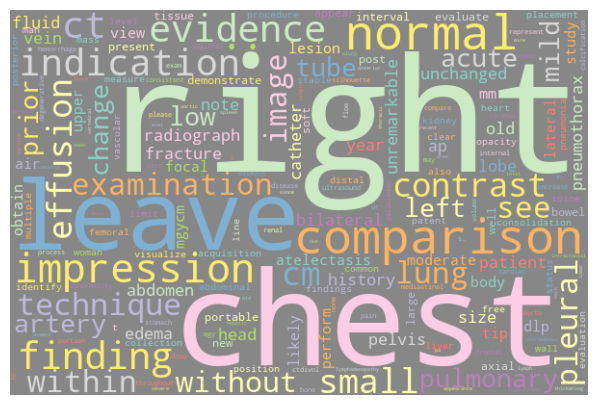

In [30]:
%pip install matplotlib
%pip install wordcloud
%pip install palettable
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
# import colourblind colours
from palettable.colorbrewer.qualitative import Set3_12

# excluded colours
exclude = ["#ff0000", "#00ff00", "#ffff00"]  # Red, Green, Yellow

# define colour func
def colour_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colour = None 
    while colour is None or colour in exclude:
        colour = Set3_12.colors[random_state.randint(len(Set3_12.colors))] 
    return tuple(colour)

# set reandom state
random_state = np.random.RandomState(42)

wordcloud = WordCloud(
    width = 600, 
    height = 400, 
    background_color="#878787",
    collocations=False, # for better visibility
    color_func=colour_func,
    random_state=random_state
    ).generate_from_frequencies(token_frequency.set_index("Token")["Frequency"])

# Create figure and axis
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [31]:
# applying topic modelling
%pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation # method of fitting model

# create count vectorizer 
vectorizer = CountVectorizer() 

# fit and transform tokens
X = vectorizer.fit_transform(token_frequency["Token"])

# Init LDA Model
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# fit model
lda.fit(X)

topics = dict()

# topics and top words
top_words_per_topic = 10
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-top_words_per_topic:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    topic_name = f"Topic {i + 1}"
    topics[topic_name] = top_words

print(topics)
        

You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
{'Topic 1': ['cm', 'clear', 'swelling', 'contrast', 'structures', 'within', 'vascular', 'they', 'location', 'dlp'], 'Topic 2': ['cm', 'there', 'identified', 'oral', 'max', 'inadequately', 'picc', 'node', 'example', 'loops'], 'Topic 3': ['xmm', 'dw', 'advanced', 'placement', 'in', 'diameter', 'obtained', 'with', 'study', 'clogged'], 'Topic 4': ['there', 'pneumonia', 'effusion', 'narrowing', 'seen', 'left', 'bilateral', 'if', 'inch', 'multilevel'], 'Topic 5': ['mm', 'performed', 'guidance', 'ultrasound', 'soft', 'post', 'casting', 'parenchymal', 'please', 'compare'], 'Topic 6': ['atelectasis', 'infarction', 'cc', 'configuration', 'due', 'at', 'impression', 'then', 'mild', 'detection'], 'Topic 7': ['there', 'present', 'prior', 'note', 'postsurgical', 'artifact', '

In [32]:
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(token_frequency["Token"])

# Apply LSA (Latent Semantic Analysis)
num_topics = 10
lsa = TruncatedSVD(n_components=num_topics)
lsa_result = lsa.fit_transform(X)

# dict to store
lsa_dict = dict()
for i, token in enumerate(token_frequency["Token"]):
    lsa_values = [lsa_result[i, j] for j in range(num_topics)]
    lsa_dict[token] = lsa_values

# convert to data frame
lsa_df = pd.DataFrame.from_dict(lsa_dict, orient="index", columns=[f"LSA{j + 1}" for j in range(num_topics)])

# visualise with heatmap using seaborn
%pip install seaborn
import seaborn as sns

# visualise
# plt.figure(figsize=(100,100))
# sns.heatmap(lsa_df, cmap="coolwarm", annot = True, fmt=".2f")
# plt.title("LSA Results Heatmap")
# plt.xlabel("LSA Components")
# plt.ylabel("Tokens")
# plt.show()

You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Broken

The code block below does not seem to run on my MacBook Air M1 (2021)

You should consider upgrading via the '/Users/alex/Kaizo's Documents/CompSci/Y3S2/FIT3163/A3/FIT3163-DSP/my_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


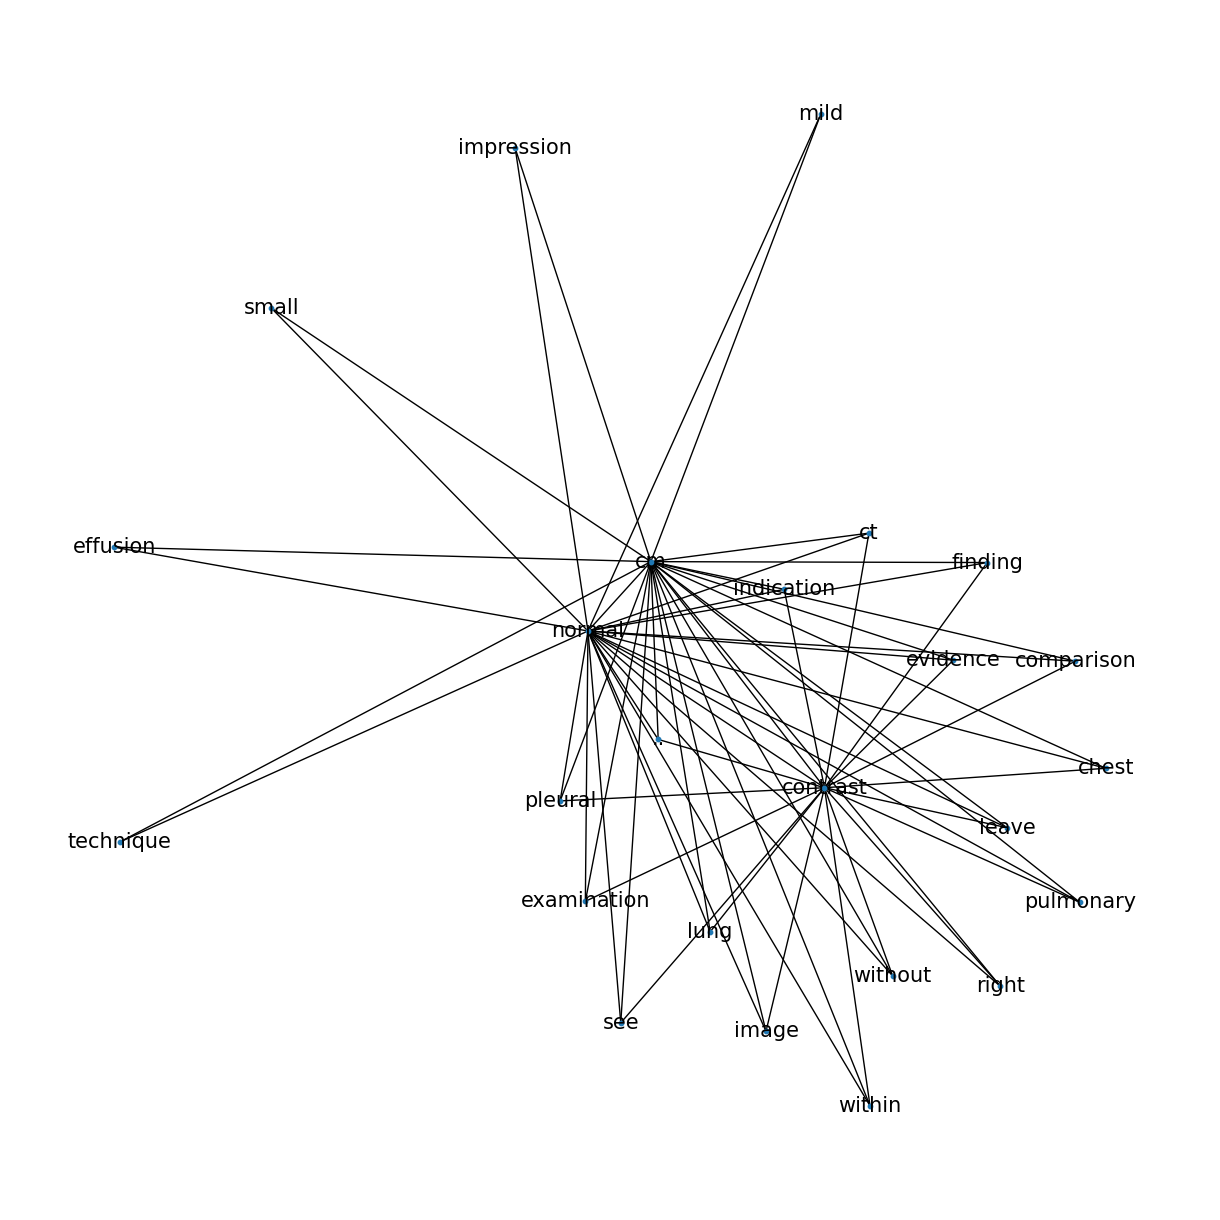

In [34]:
# network graph
%pip install networkx
import networkx as nx 
# speed
import concurrent.futures

# create network graph
G = nx.Graph()

# add tokens to graph
tokens = token_frequency["Token"]
tokens = tokens[:25]
for token in tokens:
    G.add_node(token)
    
similarity_threshold = 0.4

# add edges based on LSA results
def add_edges(i, j, k):
    similarity = abs(lsa_result[j, i] - lsa_result[k, i])
    if similarity > similarity_threshold:
        G.add_edge(tokens[j], tokens[k], weight=similarity)

# ThreadPoolExecutor for parallel processing 
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = []
    for i in range(num_topics):
        for j in range(len(tokens)):
            for k in range(j + 1, len(tokens)):
                futures.append(executor.submit(add_edges, i, j, k))
    # wait for all takss to comples
    concurrent.futures.wait(futures)

# visualise graph
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(12,12))
nx.draw(G, pos, with_labels=True, node_size = 10, font_size=15, font_color="black")
plt.show()